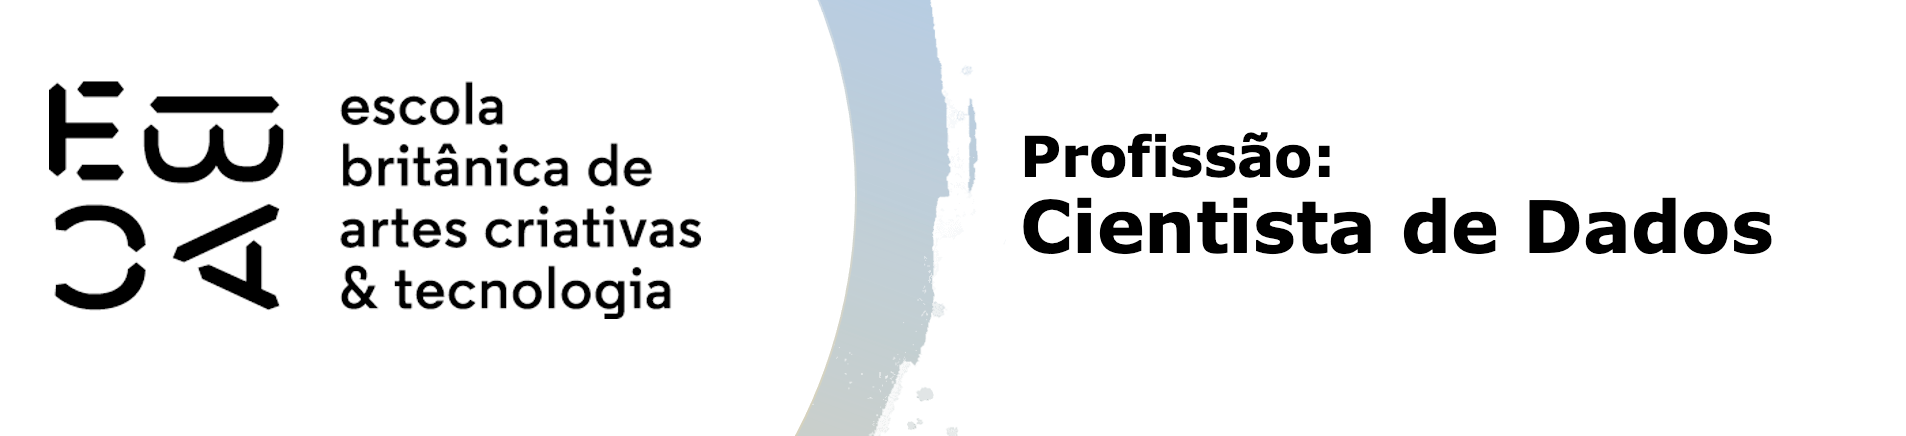

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [55]:
pip install gower

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from gower import gower_matrix
%matplotlib inline

In [57]:
df = pd.read_csv('online_shoppers_intention.csv')

In [58]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [59]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [61]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [62]:
df.nunique().to_frame()

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


Text(0.5, 1.0, 'Special Day Count')

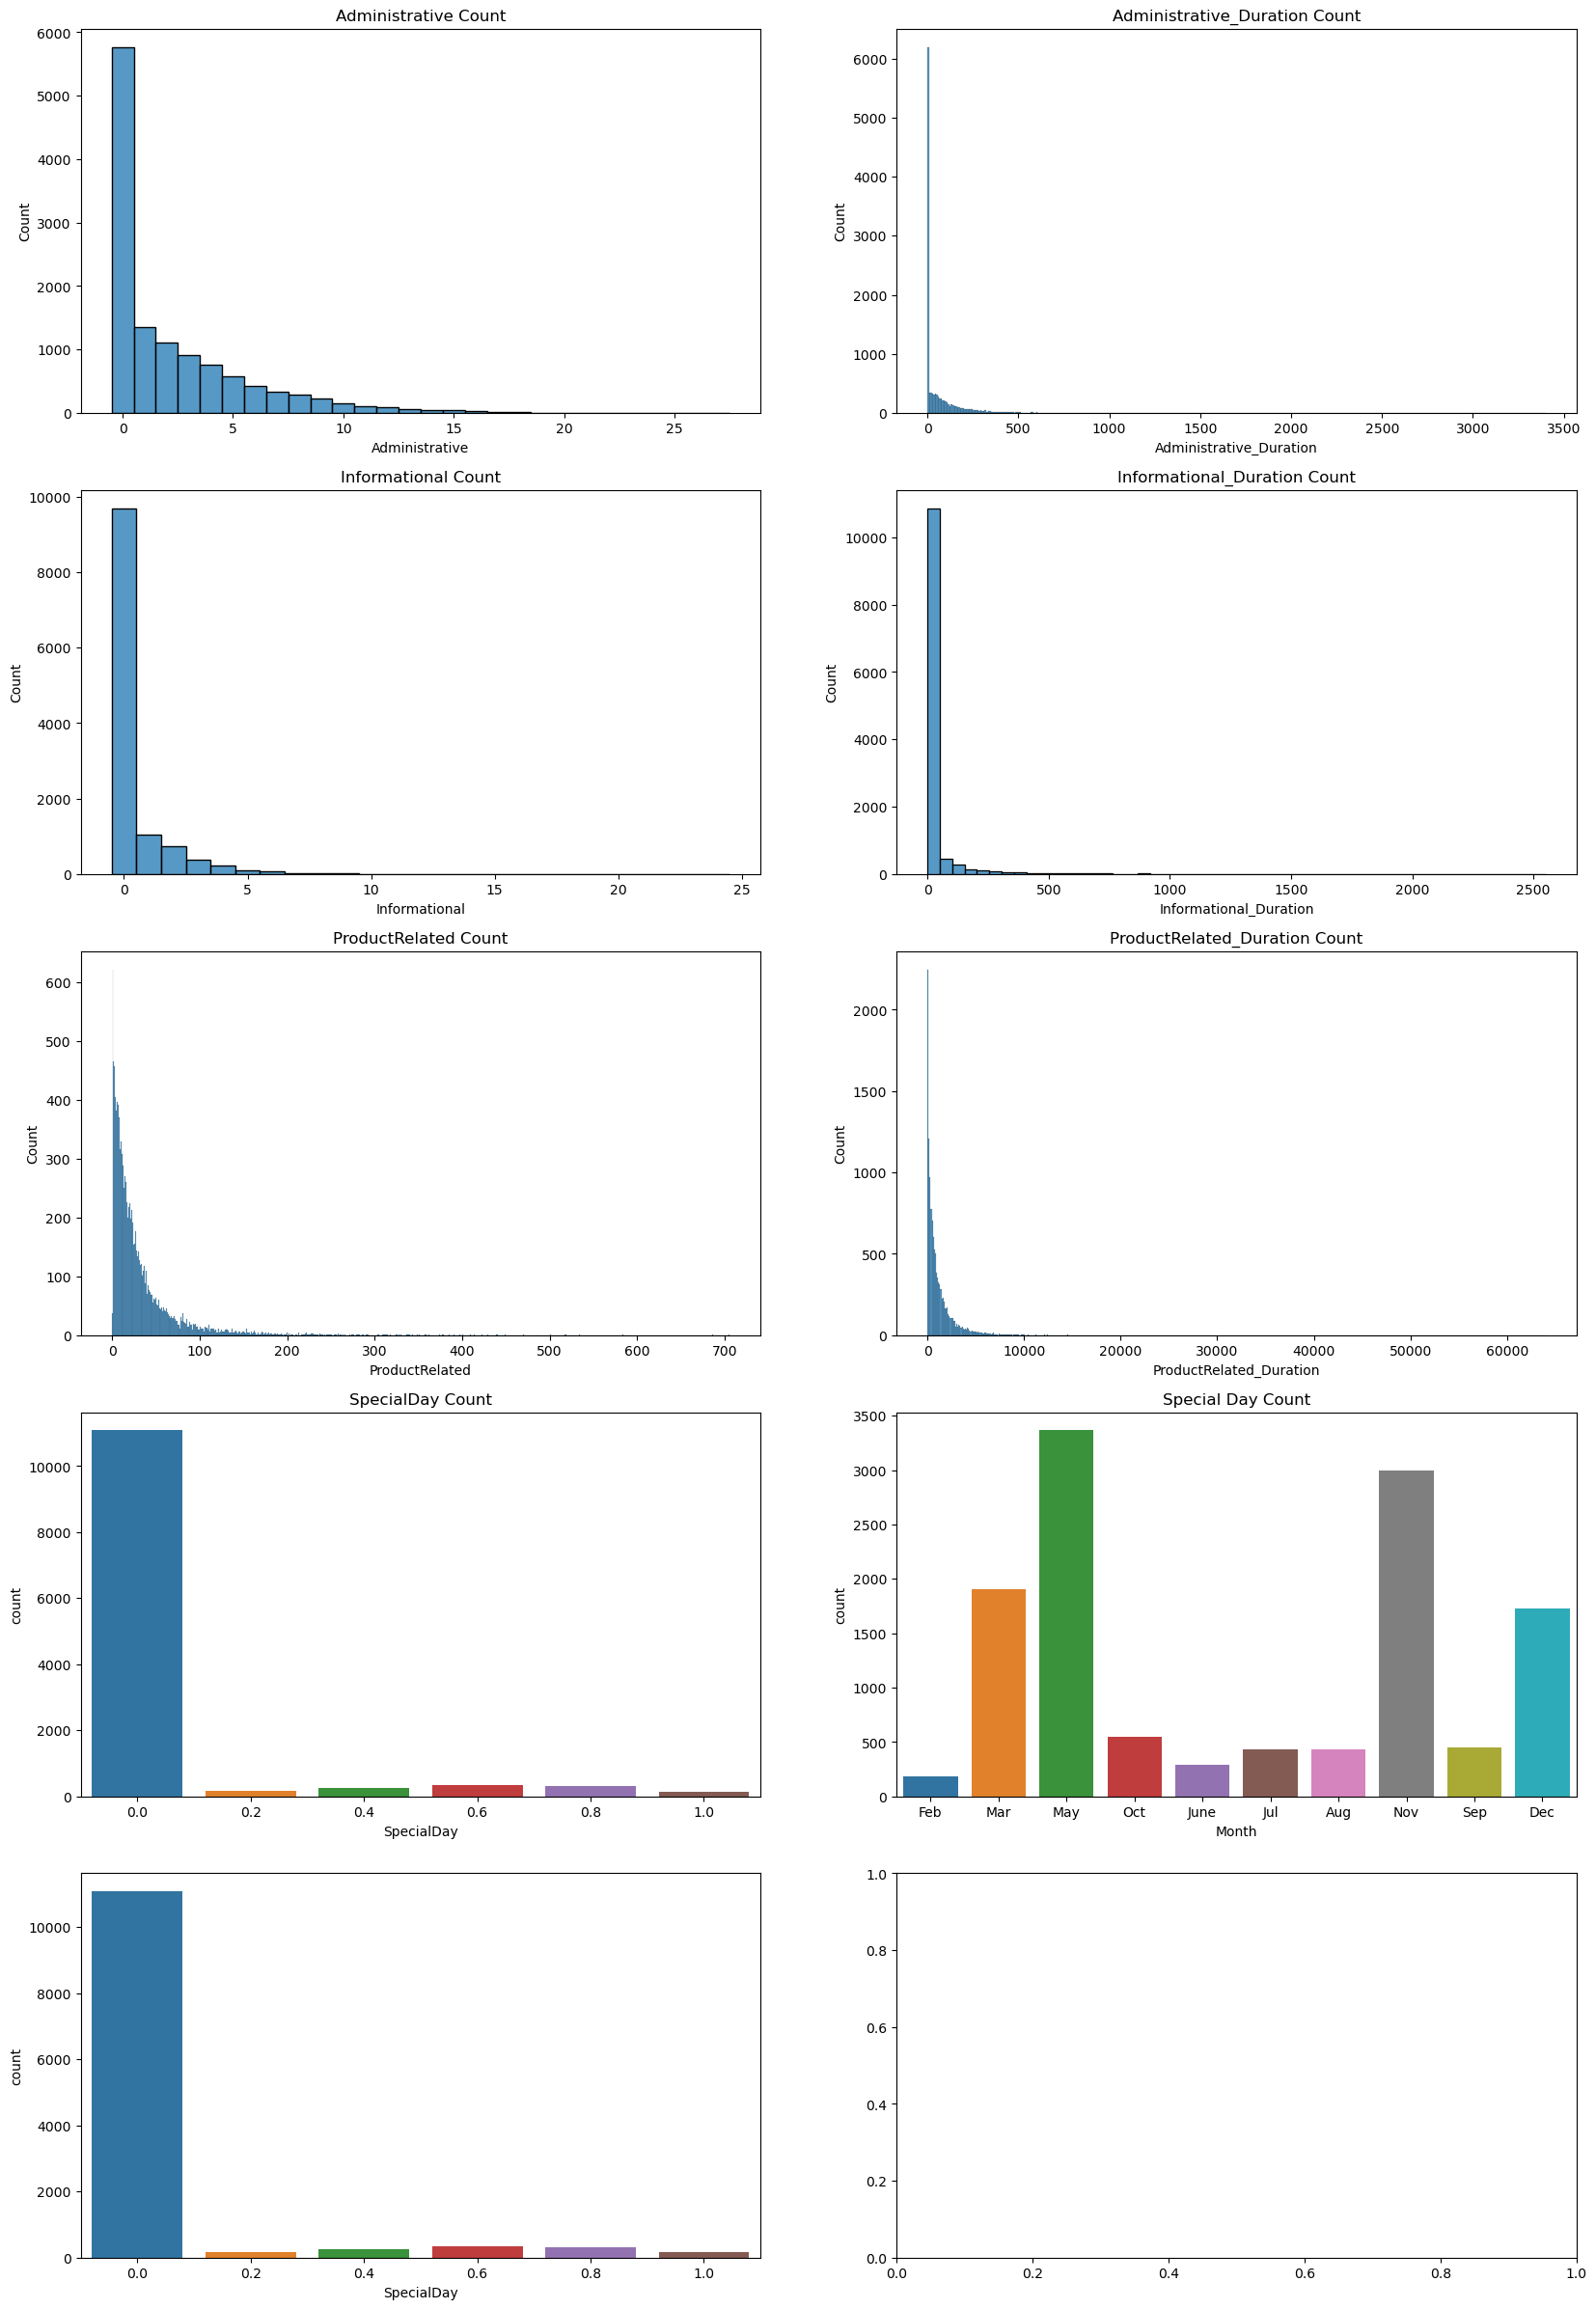

In [63]:
fig, axis = plt.subplots(5, 2, figsize=(20, 30))

sns.histplot(data=df, x='Administrative', discrete=True, ax=axis[0, 0])
axis[0, 0].set_title('Administrative Count')

sns.histplot(data=df, x='Administrative_Duration', ax=axis[0, 1])
axis[0, 1].set_title('Administrative_Duration Count')

sns.histplot(data=df, x='Informational', discrete=True, ax=axis[1, 0])
axis[1, 0].set_title('Informational Count')

sns.histplot(data=df, x='Informational_Duration', bins=50, ax=axis[1, 1])
axis[1, 1].set_title('Informational_Duration Count')

sns.histplot(data=df, x='ProductRelated', discrete=True, ax=axis[2, 0])
axis[2, 0].set_title('ProductRelated Count')

sns.histplot(data=df, x='ProductRelated_Duration', ax=axis[2, 1])
axis[2, 1].set_title('ProductRelated_Duration Count')

sns.countplot(data=df, x='SpecialDay', ax=axis[3, 0])
axis[3, 0].set_title('SpecialDay Count')

sns.countplot(data=df, x='Month', ax=axis[3, 1])
axis[3, 1].set_title('Month Count')

sns.countplot(data=df, x='SpecialDay', ax=axis[4, 0])
axis[3, 1].set_title('Special Day Count')

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [64]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [65]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
             'ProductRelated', 'ProductRelated_Duration', 'SpecialDay', 'Month', 'Weekend']

variaveis_qtd = ['Administrative', 'Administrative_Duration', 'Informational',
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

variaveis_cat = ['SpecialDay', 'Month', 'Weekend']

In [66]:
df_padrao = pd.DataFrame(StandardScaler().fit_transform(df[variaveis_qtd]), columns=df[variaveis_qtd].columns)
df_padrao[variaveis_cat] = df[variaveis_cat]
df_padrao.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Month,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.0,Feb,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,0.0,Feb,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.0,Feb,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.0,Feb,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,0.0,Feb,True


In [67]:
df_tratado = pd.get_dummies(df_padrao[variaveis].dropna(), columns=variaveis_cat)
df_tratado.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekend_False,Weekend_True
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [68]:
df_tratado.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'SpecialDay_0.0', 'SpecialDay_0.2',
       'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8',
       'SpecialDay_1.0', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'Weekend_False', 'Weekend_True'],
      dtype=object)

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [69]:
vars_cat = [True if x in {
    'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8',
    'SpecialDay_1.0', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
    'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Weekend_False', 'Weekend_True'
} else False for x in df_tratado.columns]

In [70]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   SpecialDay_0.0           12330 non-null  uint8  
 7   SpecialDay_0.2           12330 non-null  uint8  
 8   SpecialDay_0.4           12330 non-null  uint8  
 9   SpecialDay_0.6           12330 non-null  uint8  
 10  SpecialDay_0.8           12330 non-null  uint8  
 11  SpecialDay_1.0           12330 non-null  uint8  
 12  Month_Aug                12330 non-null  uint8  
 13  Month_Dec                12330 non-null  uint8  
 14  Month_Feb             

In [71]:
%%time

# calculando as distâncias
distancia_gower = gower_matrix(df_tratado, cat_features=vars_cat)

# ajustando a matriz de distâncias para alimentar o algoritmo com este objeto
gdv = squareform(distancia_gower, force='tovector')
gdv.shape

CPU times: total: 21.7 s
Wall time: 21.7 s


(76008285,)

In [72]:
Z = linkage(gdv, method='complete')

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [73]:
df_tratado['grupo_3'] = fcluster(Z, 3, criterion='maxclust')
df_tratado.grupo_3.value_counts()

2    6657
1    2840
3    2833
Name: grupo_3, dtype: int64

<Axes: xlabel='BounceRates', ylabel='grupo_3'>

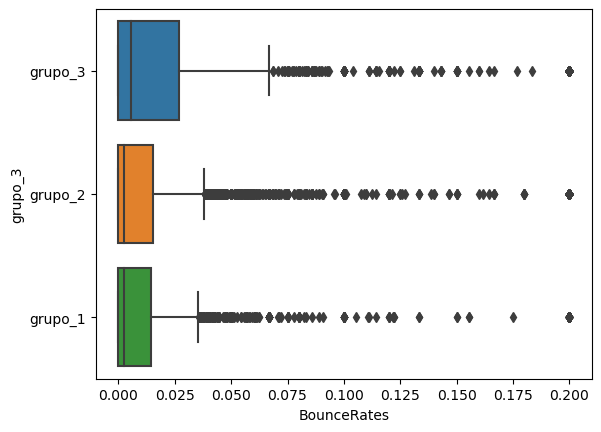

In [74]:
df_tratado_grupos = df.join(df_tratado['grupo_3'], how='left')

df_tratado_grupos['grupo_3'].replace({
    1: 'grupo_1',
    2: 'grupo_2',
    3: 'grupo_3'
}, inplace=True)

sns.boxplot(data=df_tratado_grupos, y='grupo_3', x='BounceRates')

In [75]:
pd.crosstab(df_tratado_grupos.Revenue, df_tratado_grupos.grupo_3)

grupo_3,grupo_1,grupo_2,grupo_3
Revenue,,,
False,2342,5516,2564
True,498,1141,269


In [76]:
df_tratado['grupo_4'] = fcluster(Z, 4, criterion='maxclust')
df_tratado.grupo_4.value_counts()

2    6657
1    2840
3    2649
4     184
Name: grupo_4, dtype: int64

<Axes: xlabel='BounceRates', ylabel='grupo_4'>

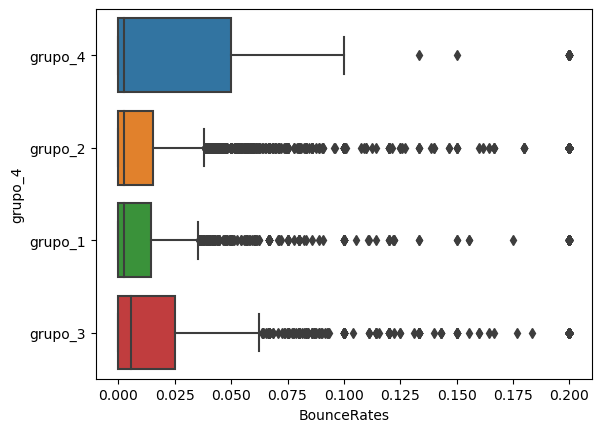

In [77]:
df_tratado_grupos = df.join(df_tratado['grupo_4'], how='left')

df_tratado_grupos['grupo_4'].replace({
    1: 'grupo_1',
    2: 'grupo_2',
    3: 'grupo_3',
    4: 'grupo_4'
}, inplace=True)

sns.boxplot(data=df_tratado_grupos, y='grupo_4', x='BounceRates')

In [78]:
pd.crosstab(df_tratado_grupos.Revenue, df_tratado_grupos.grupo_4)

grupo_4,grupo_1,grupo_2,grupo_3,grupo_4
Revenue,,,,
False,2342,5516,2383,181
True,498,1141,266,3


In [79]:
df_tratado['grupo_2'] = fcluster(Z, 2, criterion='maxclust')
df_tratado.grupo_2.value_counts()

2    9490
1    2840
Name: grupo_2, dtype: int64

<Axes: xlabel='BounceRates', ylabel='grupo_2'>

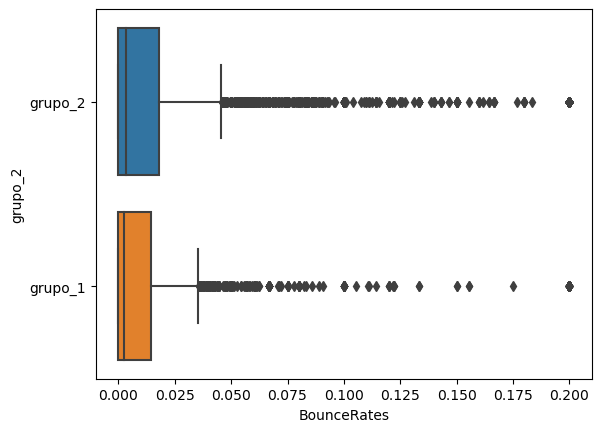

In [80]:
df_tratado_grupos = df.join(df_tratado['grupo_2'], how='left')

df_tratado_grupos['grupo_2'].replace({
    1: 'grupo_1',
    2: 'grupo_2',
}, inplace=True)

sns.boxplot(data=df_tratado_grupos, y='grupo_2', x='BounceRates')

In [81]:
pd.crosstab(df_tratado_grupos.Revenue, df_tratado_grupos.grupo_2)

grupo_2,grupo_1,grupo_2
Revenue,,
False,2342,8080
True,498,1410


In [82]:
df_tratado['grupo_6'] = fcluster(Z, 6, criterion='maxclust')
df_tratado.grupo_6.value_counts()

4    6655
1    2839
5    2649
6     184
3       2
2       1
Name: grupo_6, dtype: int64

<Axes: xlabel='BounceRates', ylabel='grupo_6'>

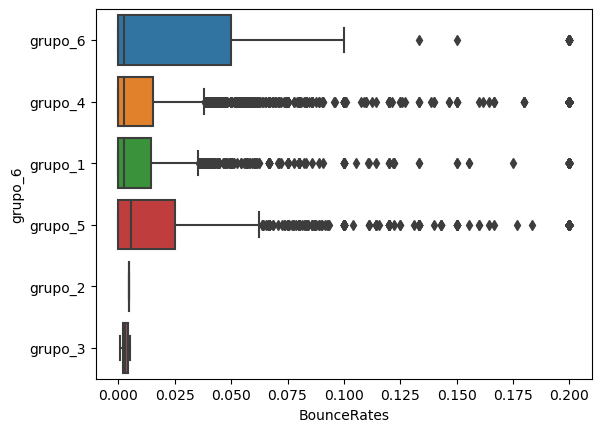

In [83]:
df_tratado_grupos = df.join(df_tratado['grupo_6'], how='left')

df_tratado_grupos['grupo_6'].replace({
    1: 'grupo_1',
    2: 'grupo_2',
    3: 'grupo_3',
    4: 'grupo_4',
    5: 'grupo_5',
    6: 'grupo_6'
}, inplace=True)

sns.boxplot(data=df_tratado_grupos, y='grupo_6', x='BounceRates')

In [84]:
pd.crosstab(df_tratado_grupos.Revenue, df_tratado_grupos.grupo_6)

grupo_6,grupo_1,grupo_2,grupo_3,grupo_4,grupo_5,grupo_6
Revenue,,,,,,
False,2341,1,2,5514,2383,181
True,498,0,0,1141,266,3


In [85]:
df_tratado['grupo_3'] = fcluster(Z, 3, criterion='maxclust')
df_tratado_grupos = df.join(df_tratado['grupo_3'], how='left')

df_tratado_grupos['grupo_3'].replace({
    1: 'grupo_1',
    2: 'grupo_2',
    3: 'grupo_3'
}, inplace=True)

pd.crosstab(df_tratado_grupos.Revenue, df_tratado_grupos.grupo_3, normalize='columns')

grupo_3,grupo_1,grupo_2,grupo_3
Revenue,,,
False,0.824648,0.828601,0.905048
True,0.175352,0.171399,0.094952


CPU times: total: 34.8 s
Wall time: 29.8 s


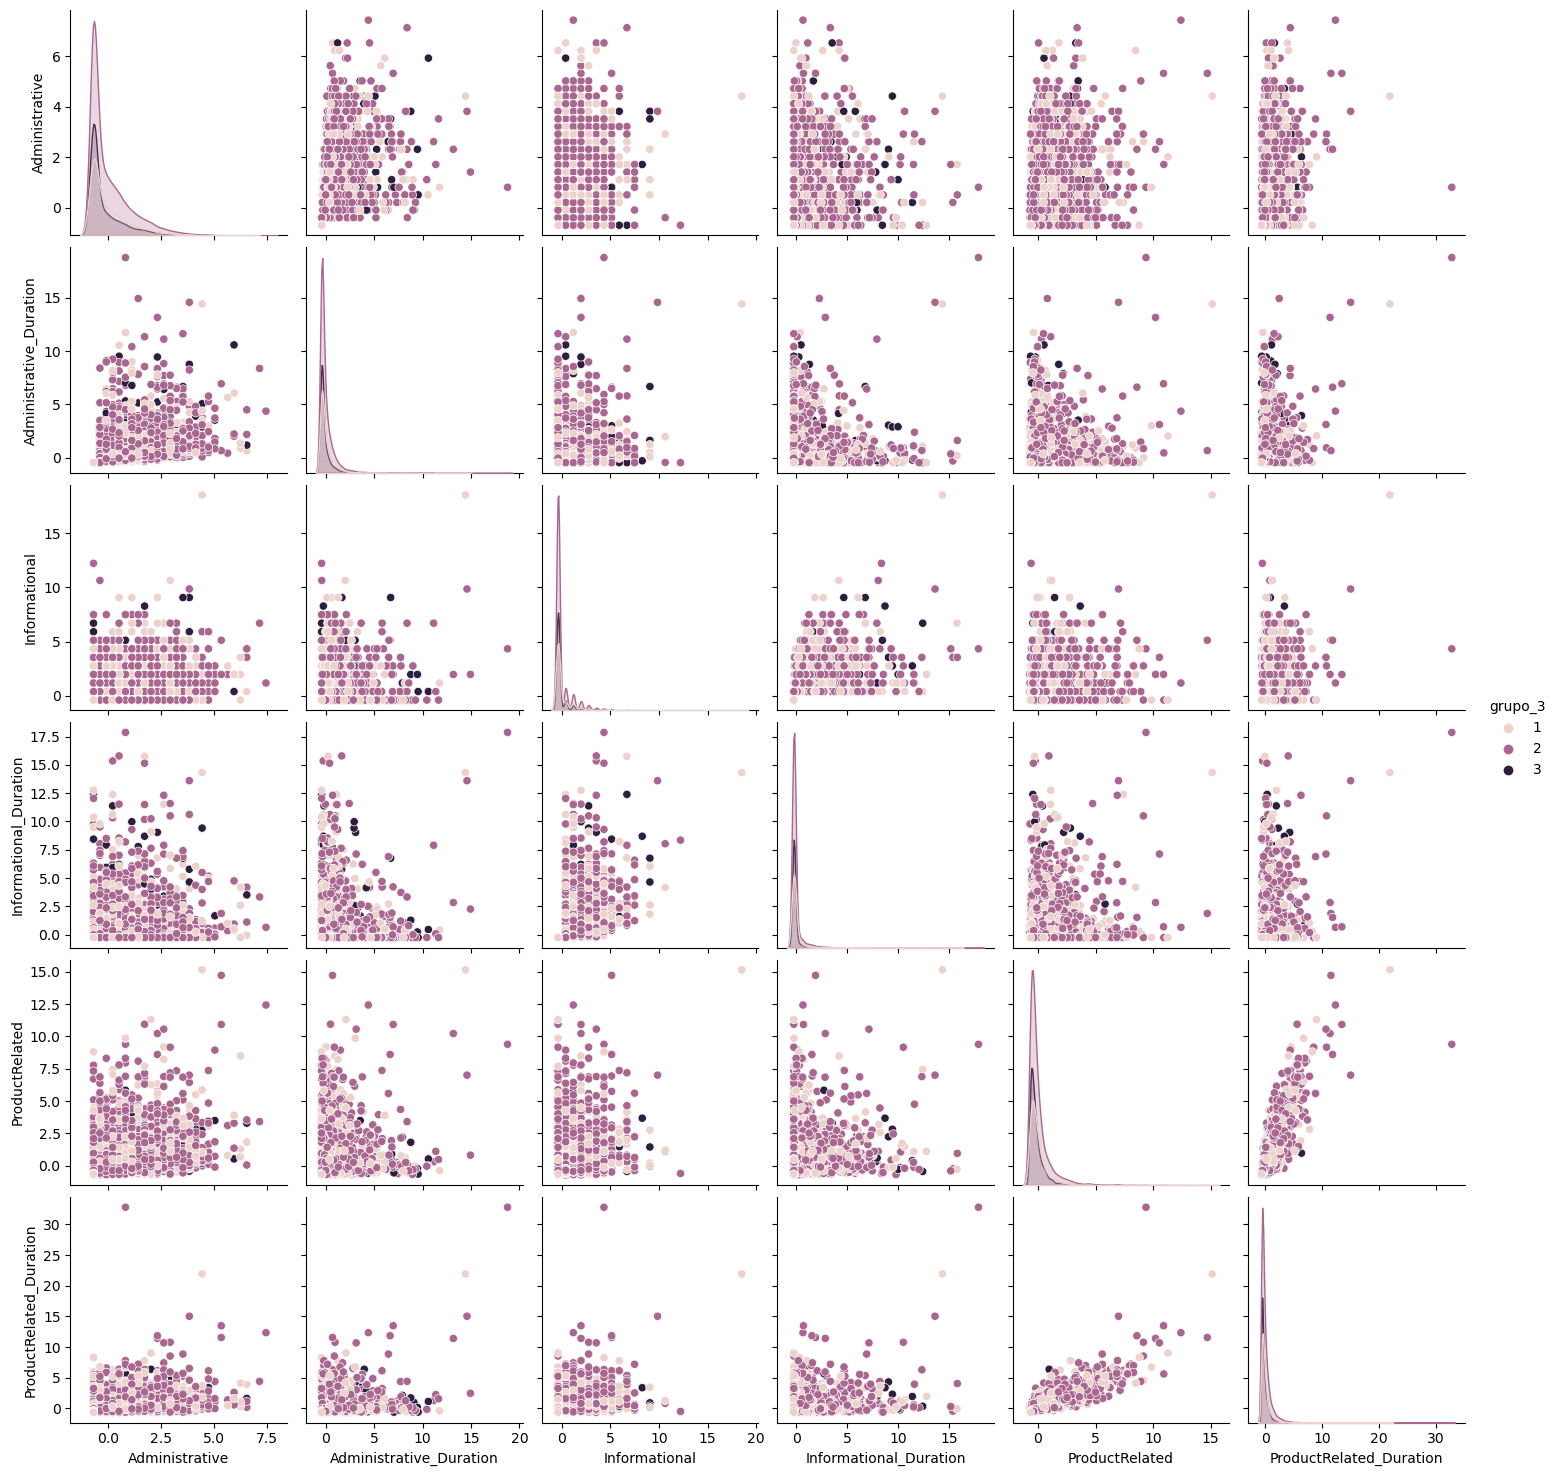

In [86]:
%%time
sns.pairplot(df_tratado[[
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'grupo_3'
]], hue='grupo_3')

<Axes: xlabel='Weekend', ylabel='count'>

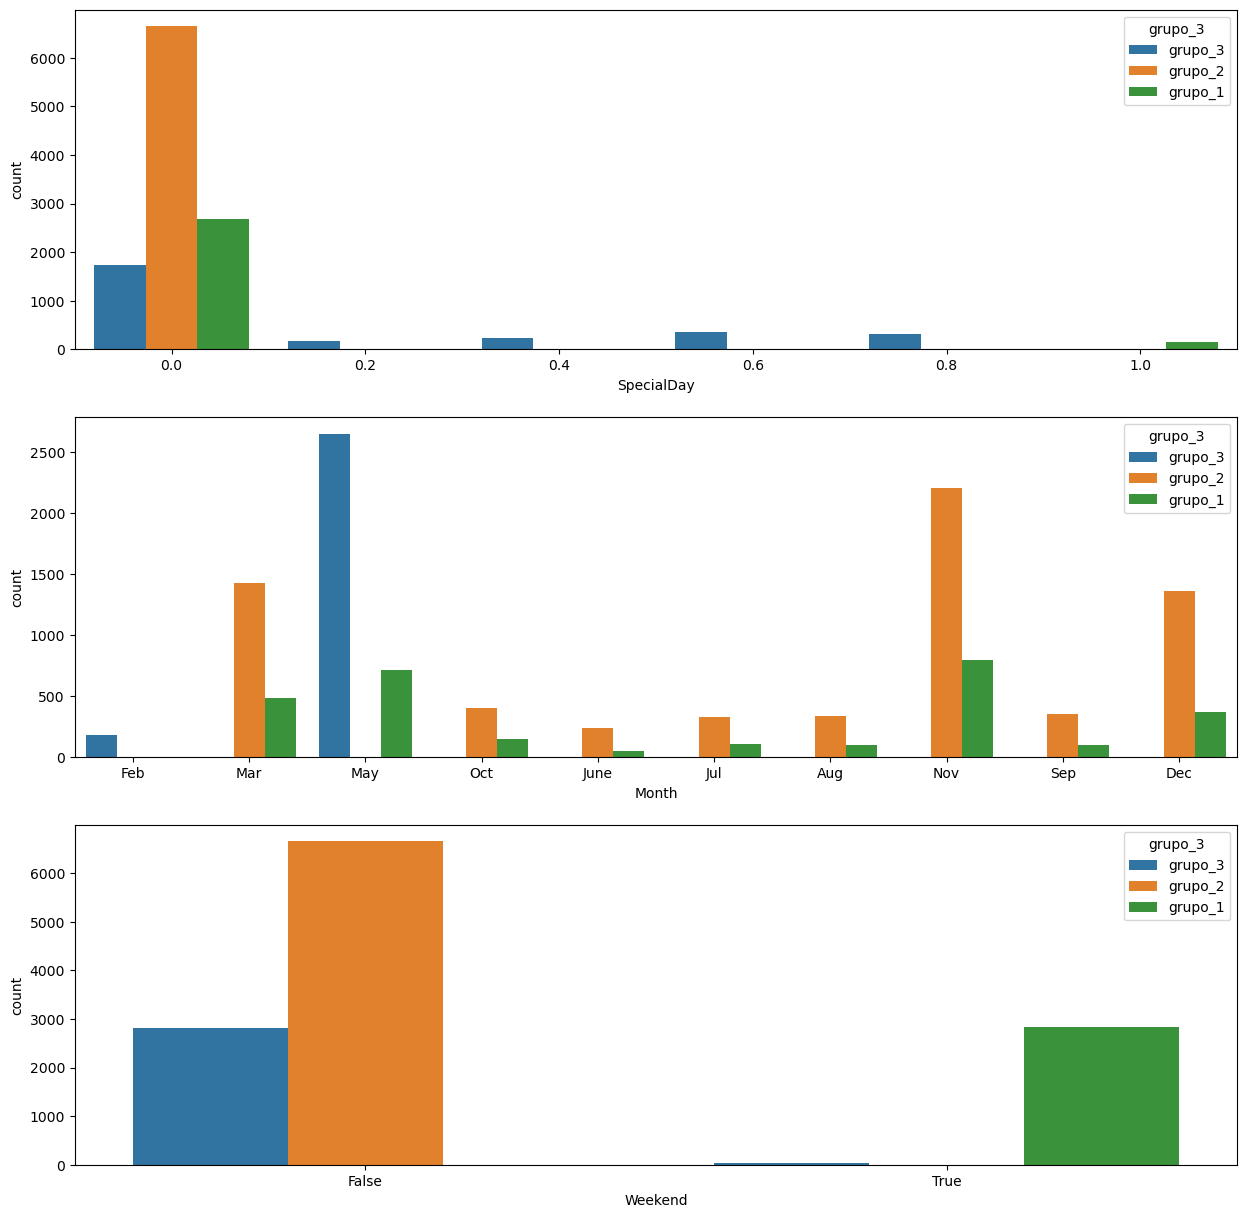

In [87]:
fig, axis = plt.subplots(3, 1, figsize=(15, 15))

sns.countplot(data=df_tratado_grupos, x="SpecialDay", hue='grupo_3', ax=axis[0])
sns.countplot(data=df_tratado_grupos, x="Month", hue='grupo_3', ax=axis[1])
sns.countplot(data=df_tratado_grupos, x="Weekend", hue='grupo_3', ax=axis[2])

In [88]:
df_tratado['grupo_2'] = fcluster(Z, 2, criterion='maxclust')
df_tratado_grupos = df.join(df_tratado['grupo_2'], how='left')

df_tratado_grupos['grupo_2'].replace({
    1: 'grupo_1',
    2: 'grupo_2',
}, inplace=True)

pd.crosstab(df_tratado_grupos.Revenue, df_tratado_grupos.grupo_2, normalize='columns')

grupo_2,grupo_1,grupo_2
Revenue,,
False,0.824648,0.851423
True,0.175352,0.148577


CPU times: total: 29.6 s
Wall time: 24.8 s


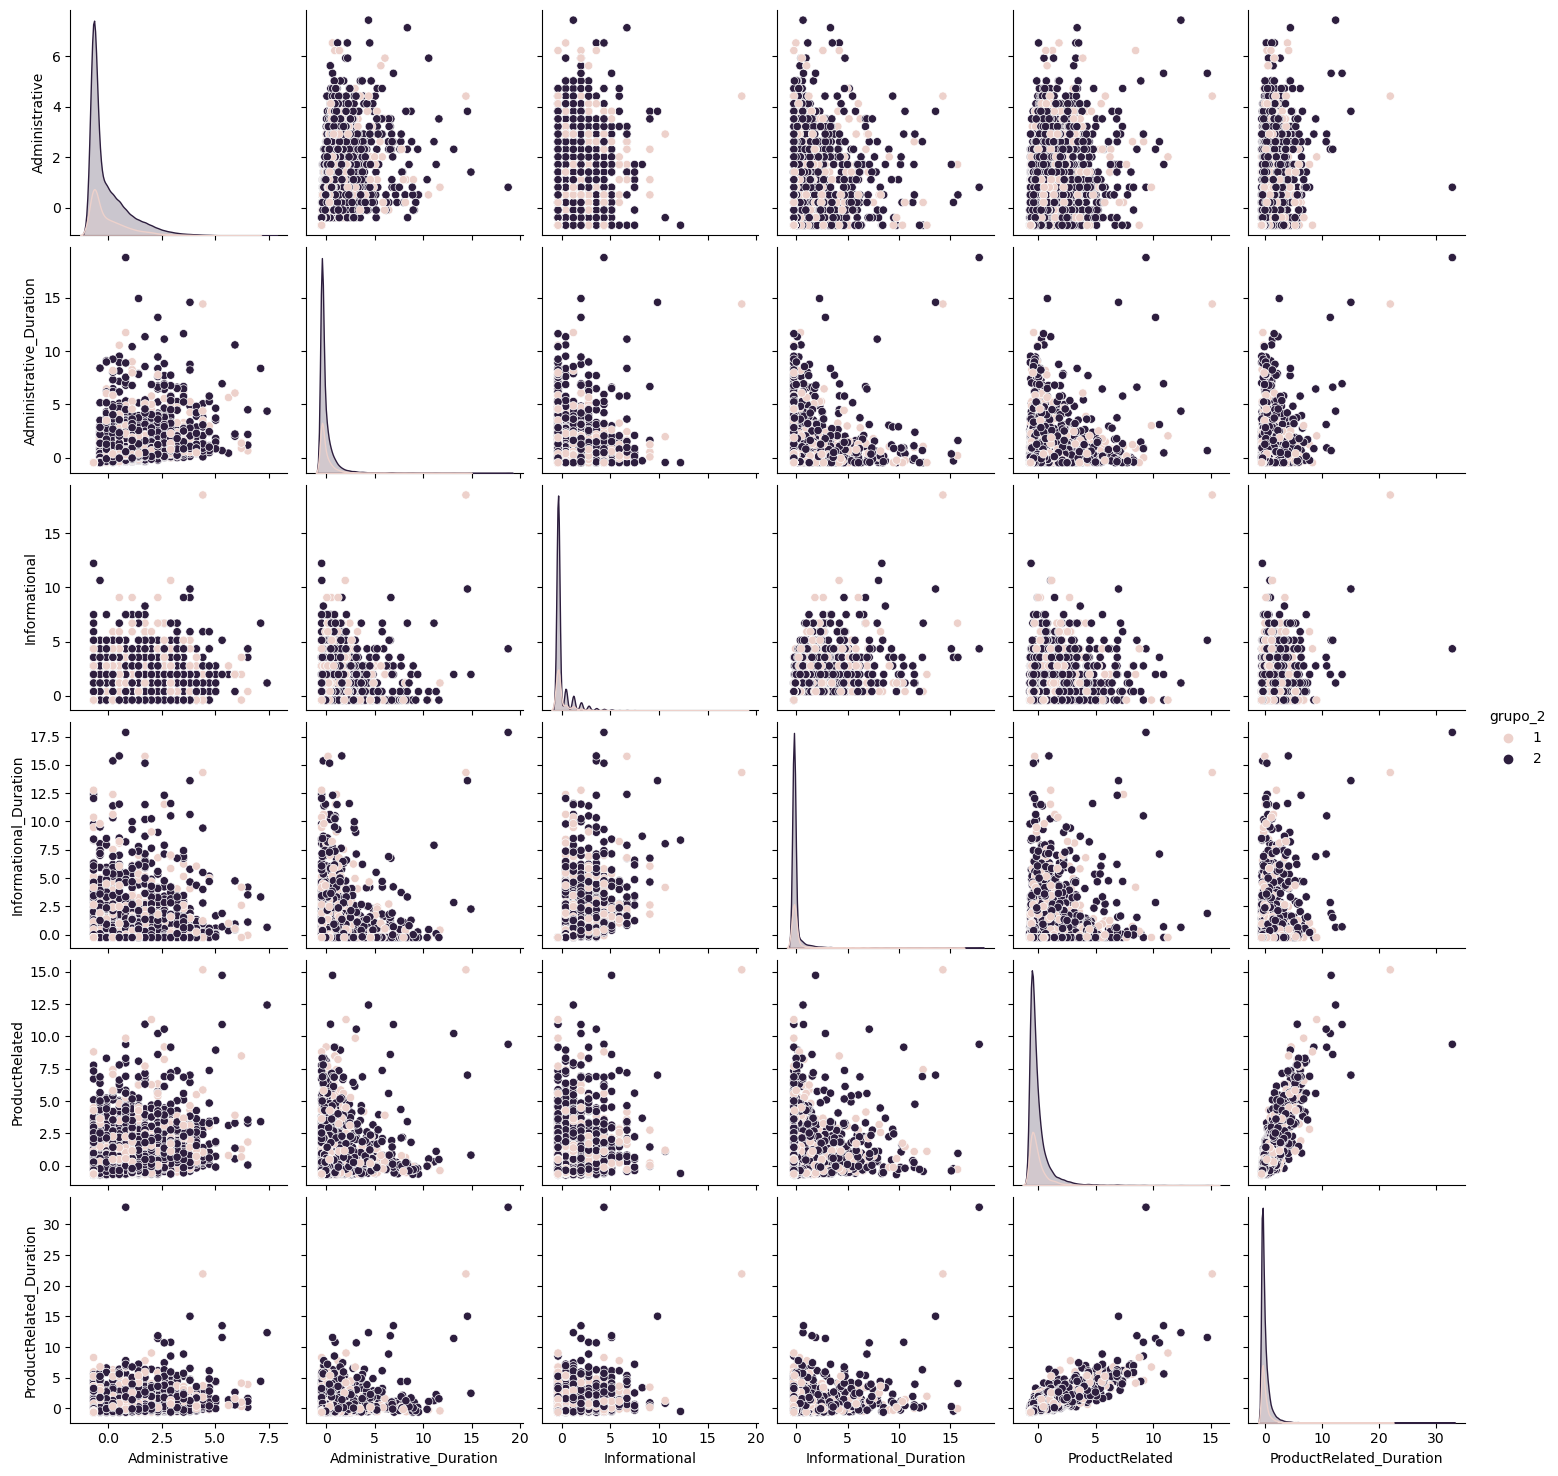

In [89]:
%%time
sns.pairplot(df_tratado[[
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'grupo_2'
]], hue='grupo_2')

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

Analisando o agrupamento hierárquico com 2 e 3 o grupo 1 apresentou melhores valores:<br>
- Menor Bounce Rate<br>
- Maior Revenue=Ture<br>

Conclusão:
- O Grupo 1 está mais propenso a compras.